In [1]:
import pickle

emukit_model = pickle.load(open('../experimental_design/timeLoss_model_variance_100_iter_batch_size_1.pkl', "rb"))
emukit_model.optimize()

In [2]:
from experimental_design.config import get_ofat_parameter_spaces
parameter_spaces = get_ofat_parameter_spaces()

In [3]:
from emukit.core.initial_designs import RandomDesign

idx = 2

design = RandomDesign(parameter_spaces[idx])  # initialize with random points
num_data_points = 25
test_X = design.get_samples(num_data_points)
pred_Y, pred_Y_variance = emukit_model.predict(test_X)

x = test_X[:, idx]
y = pred_Y[:, 0]

In [4]:
p = x.argsort()

In [5]:
x = x[p]
y = y[p]

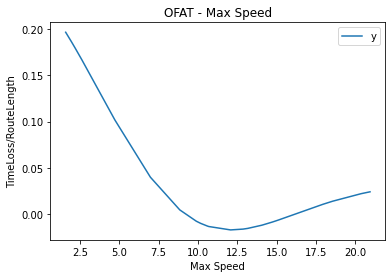

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

d = {'x': x, 'y': y}
fig, ax = plt.subplots()
pd.DataFrame(d).plot.line(x='x', y='y', ax=ax)
ax.set_title('OFAT - Max Speed')
ax.set_ylabel('TimeLoss/RouteLength')
ax.set_xlabel('Max Speed')

fig.show()